In [1]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib

In [2]:
shots_detail = pd.read_csv("shots_detail.csv")

In [3]:
shots_detail

,shots_detailID,TableIndex,MatchID,GameWeek,Player,ForTeam,AgainstTeam,RelativeStrength,Time,ShotOutcome,AssistedBy,ShotType,ShotPosition,ShotSide,Close
0,1,0,58901,1,Dominic Calvert-Lewin,Everton,Tottenham Hotspur,-1,55,Goal,Lucas Digne,header,the box,the centre,close
1,2,1,58901,1,Ben Davies,Tottenham Hotspur,Everton,1,81,Blocked,Toby Alderweireld,left footed shot,the six yard box,the right,not close
2,3,2,58901,1,Richarlison,Everton,Tottenham Hotspur,-1,71,Blocked,Seamus Coleman,right footed shot,the box,the left,not close
3,4,3,58901,1,Andre Gomes,Everton,Tottenham Hotspur,-1,53,Blocked,Abdoulaye Doucoure,left footed shot,the box,the centre,not close
4,5,4,58901,1,Lucas Moura,Tottenham Hotspur,Everton,1,39,Blocked,Son Heung-Min,header,the box,the centre,not close
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9196,9197,17,59273,38,John Egan,Sheffield United,Burnley,0,57,Miss,Oliver Norwood,header,the box,the centre,not close
9197,9198,18,59273,38,David McGoldrick,Sheffield United,Burnley,0,52,Miss,Oliver Norwood,header,the box,the centre,close
9198,9199,19,59273,38,David McGoldrick,Sheffield United,Burnley,0,15,Miss,George Baldock,left footed shot,the six yard box,the left,not close
9199,9200,20,59273,38,Jimmy Dunne,Burnley,Sheffield United,0,11,Miss,NaN,right footed shot,the box,the centre,not close


In [4]:
df = shots_detail[shots_detail.ForTeam == "Manchester City"]

In [5]:
df

,shots_detailID,TableIndex,MatchID,GameWeek,Player,ForTeam,AgainstTeam,RelativeStrength,Time,ShotOutcome,AssistedBy,ShotType,ShotPosition,ShotSide,Close
303,304,0,58915,2,Gabriel Jesus,Manchester City,Wolverhampton Wanderers,2,90+5,Goal,Kevin De Bruyne,right footed shot,the box,the left,close
305,306,2,58915,2,Phil Foden,Manchester City,Wolverhampton Wanderers,2,32,Goal,Raheem Sterling,left footed shot,the box,the centre,close
306,307,3,58915,2,Kevin De Bruyne,Manchester City,Wolverhampton Wanderers,2,20,Goal,NaN,right footed shot,penalty,NaN,close
309,310,6,58915,2,Kyle Walker,Manchester City,Wolverhampton Wanderers,2,63,Blocked,Kevin De Bruyne,right footed shot,outside the box,NaN,not close
312,313,9,58915,2,Benjamin Mendy,Manchester City,Wolverhampton Wanderers,2,8,Blocked,Rodrigo,right footed shot,outside the box,NaN,not close
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9172,9173,22,59272,38,Fernandinho,Manchester City,Everton,2,85,Miss,Kevin De Bruyne,right footed shot,outside the box,NaN,not close
9173,9174,23,59272,38,Gabriel Jesus,Manchester City,Everton,2,68,Miss,Raheem Sterling,right footed shot,the box,the centre,not close
9174,9175,24,59272,38,Rodrigo,Manchester City,Everton,2,58,Miss,Raheem Sterling,left footed shot,the box,the centre,not close
9177,9178,27,59272,38,Riyad Mahrez,Manchester City,Everton,2,23,Miss,Kevin De Bruyne,left footed shot,the box,the right,not close


In [134]:
edge_data_df = pd.DataFrame([df.Player, df.AssistedBy]).transpose()

In [135]:
edge_data_df

,Player,AssistedBy
303,Gabriel Jesus,Kevin De Bruyne
305,Phil Foden,Raheem Sterling
306,Kevin De Bruyne,NaN
309,Kyle Walker,Kevin De Bruyne
312,Benjamin Mendy,Rodrigo
...,...,...
9172,Fernandinho,Kevin De Bruyne
9173,Gabriel Jesus,Raheem Sterling
9174,Rodrigo,Raheem Sterling
9177,Riyad Mahrez,Kevin De Bruyne


In [8]:
edge_data_df = edge_data_df.dropna()

In [9]:
indexAssisted = edge_data_df[edge_data_df['AssistedBy'] == "Ederson"].index
edge_data_df.drop(indexAssisted, inplace=True)
edge_data_df

/Users/ritikadesai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Player,AssistedBy
303,Gabriel Jesus,Kevin De Bruyne
305,Phil Foden,Raheem Sterling
309,Kyle Walker,Kevin De Bruyne
312,Benjamin Mendy,Rodrigo
313,Gabriel Jesus,Kevin De Bruyne
...,...,...
9172,Fernandinho,Kevin De Bruyne
9173,Gabriel Jesus,Raheem Sterling
9174,Rodrigo,Raheem Sterling
9177,Riyad Mahrez,Kevin De Bruyne


In [10]:
edge_data = edge_data_df.values.tolist()

In [11]:
edge_data

[['Gabriel Jesus', 'Kevin De Bruyne'],
 ['Phil Foden', 'Raheem Sterling'],
 ['Kyle Walker', 'Kevin De Bruyne'],
 ['Benjamin Mendy', 'Rodrigo'],
 ['Gabriel Jesus', 'Kevin De Bruyne'],
 ['Gabriel Jesus', 'Kevin De Bruyne'],
 ['Kevin De Bruyne', 'Gabriel Jesus'],
 ['Raheem Sterling', 'Phil Foden'],
 ['Rodrigo', 'Kevin De Bruyne'],
 ['Phil Foden', 'Kevin De Bruyne'],
 ['Nathan Ake', 'Riyad Mahrez'],
 ['Liam Delap', 'Benjamin Mendy'],
 ['Kyle Walker', 'Kevin De Bruyne'],
 ['Kyle Walker', 'Eric Garcia'],
 ['Fernandinho', 'Kevin De Bruyne'],
 ['Raheem Sterling', 'Riyad Mahrez'],
 ['Kevin De Bruyne', 'Ferran Torres'],
 ['Raheem Sterling', 'Kevin De Bruyne'],
 ['Kevin De Bruyne', 'Riyad Mahrez'],
 ['Raheem Sterling', 'Ferran Torres'],
 ['Phil Foden', 'Riyad Mahrez'],
 ['Kevin De Bruyne', 'Raheem Sterling'],
 ['Phil Foden', 'Kyle Walker'],
 ['Raheem Sterling', 'Phil Foden'],
 ['Kevin De Bruyne', 'Raheem Sterling'],
 ['Ferran Torres', 'Raheem Sterling'],
 ['Kyle Walker', 'Phil Foden'],
 ['Raheem 

In [ ]:
shots = nx.Graph()
shots.add_nodes_from(edge_data_df["Player"])
default_weight = 10

for nodes in edge_data:
    n0 = nodes[0]
    n1 = nodes[1]
    if shots.has_edge(n0,n1):
        shots[n0][n1]['weight'] += 1
        shots.edges(data=True)
    else:
        shots.add_edge(n0,n1, weight=1)
    
edges, weights = zip(*nx.get_edge_attributes(shots, 'weight').items())



plt.figure(figsize=(16,12))
# fig, ax = plt.subplots(figsize = (18,10))
d = dict(shots.degree)
print(d.values)
pos = nx.kamada_kawai_layout(shots)

for area in [150, 350, 550, 850]:
    plt.scatter([], [], c='skyblue', s = area, label=str(area)+' assists')
plt.legend(scatterpoints = 1, frameon = False, labelspacing = 2.5, title='Assisting')
for area in [6, 12, 18, 24]:
    plt.plot([], [], c='gray', linewidth = area/2, label=str(area) +' times')
plt.legend(scatterpoints = 1, frameon = False, labelspacing = 2.5, title='Assisting')
nx.draw(
    shots, 
    pos,
    style="solid", 
    edge_color = [(165, 163, 164, 0.9)], 
    node_color = "#a1c7e9",
    with_labels = True, 
    node_size=[v * 500 for v in d.values()], 
    width = weights, 
    font_color = "black", alpha = 0.9)
# plt.show()
plt.savefig(
    "shots-plot.png", 
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.3
)


In [ ]:
max(weights)

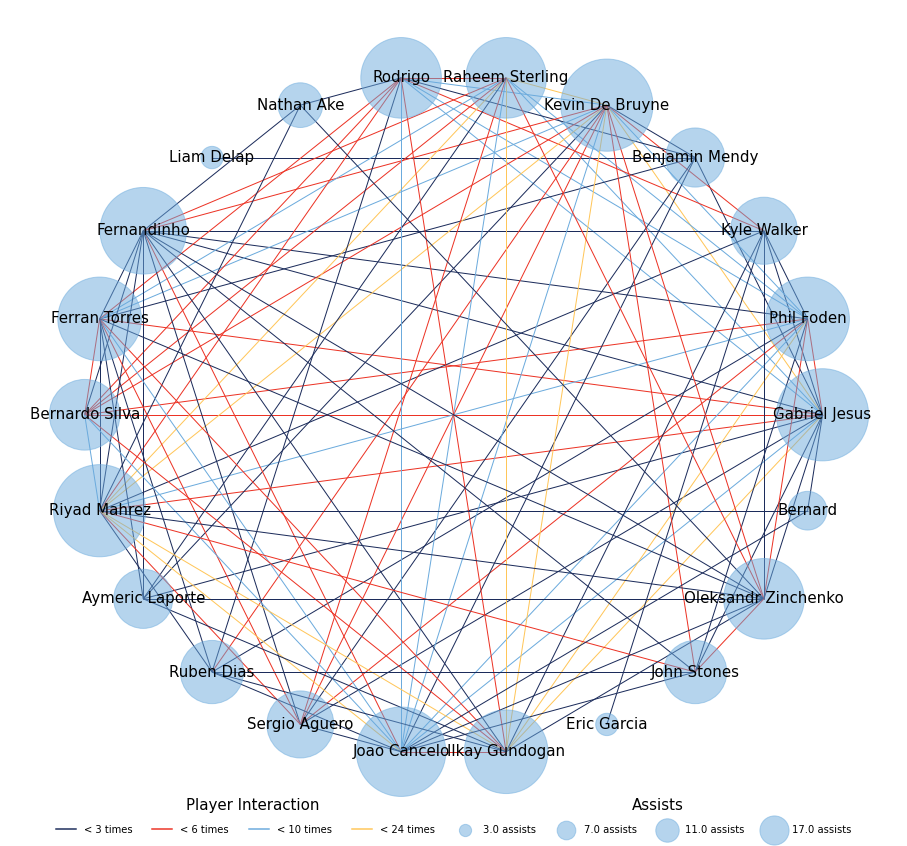

In [131]:
shots = nx.Graph()
shots.add_nodes_from(edge_data_df["Player"])
default_weight = 10

for nodes in edge_data:
    n0 = nodes[0]
    n1 = nodes[1]
    if shots.has_edge(n0,n1):
        shots[n0][n1]['weight'] += 1
        shots.edges(data=True)
    else:
        shots.add_edge(n0,n1, weight=1)
    
edges, weights = zip(*nx.get_edge_attributes(shots, 'weight').items())

edgeColor = []

for i in weights:
    if(i < 3):
        edgeColor.append("#1C2C5B")
    elif(i >= 3 and i < 6):
        edgeColor.append("#EC3325")
    elif(i >= 6 and i < 10):
        edgeColor.append("#6CABDD")
    else:
        edgeColor.append("#FFC659")

# plt.figure(figsize=(16,12))
fig, ax = plt.subplots(figsize = (16,15))
d = dict(shots.degree)
pos = nx.circular_layout(shots, center = (87,45))
c=np.array([0.423, 0.67, 0.8666,0.5]).reshape(1,-1)

nx.draw(
    shots, 
    pos,
    style="solid", 
    edge_color = [e for e in edgeColor],
    node_color = c,
    with_labels = True, 
    node_size=[v * 500 for v in d.values()], 
#     width = weights, 
    font_color = "black", font_size=15
)
# plt.show()

colorCode = {
    "#1C2C5B": "< 3 times",
    "#EC3325": "< 6 times",
    "#6CABDD": "< 10 times",
    "#FFC659": "< 24 times"
}

for k,v in colorCode.items():
    plt.plot([], [], c=k, label=v)
    

for area in [150, 350, 550, 850]:
    plt.scatter([], [], c=c, s = area, label=str(area/50)+' assists')
    

plt.legend(borderaxespad=0,
    frameon = False,
    loc="lower center",
    ncol=8, bbox_to_anchor=(0.5, -0.02)
);

plt.text(0.2, 0.015, "Player Interaction", transform=ax.transAxes, fontsize = 15)
plt.text(0.7, 0.015, "Assists", transform=ax.transAxes, fontsize = 15)

plt.savefig(
    "shots-plot.png", 
    dpi=300,
    bbox_inches="tight",
    pad_inches=0.3
)